# Data cleaning - Traffic accident frequency based on weather conditions. 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

The first step to data cleaning is gathering your data. The readme files give you all the information and links to the websites where the datasets were obtained from.

In [66]:
# reading the csv
collisions_df = pd.read_csv("Motor_Vehicle_Collisions_-_Crashes.csv")
persons_df = pd.read_csv("Motor_Vehicle_Collisions_-_Person_20241111.csv")

You can uncheck the columns below as a form of data exploration. The columns below were used in the cleaning process, and added clutter to the main file hence they are commented out.

In [39]:
# collisions_df.head(5)
# rows, columns = collisions_df.shape
# print(f"Number of rows: {rows}, Number of columns: {columns}") Number of rows: 564824, Number of columns: 29

In [40]:
# persons_df.head(5)
# rows, columns = persons_df.shape
# print(f"Number of rows: {rows}, Number of columns: {columns}") Number of rows: 56532, Number of columns: 21

I filled all missing ages with -1 because I anticipated data loss from the restrictive merge conditions I planned to apply. My goal was to minimize any further data loss, so I assigned -1 to the missing age values. Further manipulation of the "age" column will be required in the future, but for now, -1 is used to avoid losing more data than necessary.

In [43]:
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].fillna(-1)
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].astype(int)

In [96]:
print("\nNull Values in Collisions Data:")
print(collisions_df.isnull().sum())
print("\nData Types in Collisions Data:")
print(collisions_df.dtypes)


Null Values in Collisions Data:
CRASH DATE                       0
CRASH TIME                       0
LATITUDE                         0
LONGITUDE                        0
LOCATION                         0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
dtype: int64

Data Types in Collisions Data:
CRASH DATE                       datetime64[ns]
CRASH TIME                               object
LATITUDE                                 object
LONGITUDE                                object
LOCATION                                 object
NUMBER OF PERSONS INJURED                 int32
NUMBER OF PERSONS KILLED                  int64
NUMBER OF PEDESTRIANS INJU

In [130]:
print("\nNull Values in Persons Data:")
print(persons_df.isnull().sum())
print("\nData Types in Persons Data:")
print(persons_df.dtypes)


Null Values in Persons Data:
COLLISION_ID    0
CRASH DATE      0
CRASH TIME      0
PERSON_AGE      0
PERSON_SEX      0
dtype: int64

Data Types in Persons Data:
COLLISION_ID             int64
CRASH DATE      datetime64[ns]
CRASH TIME              object
PERSON_AGE               int32
PERSON_SEX              object
dtype: object


## Collisions Dataset
- convert crashdate and crashtime to datetime format in both person and crashes data.
- For the crash data, drop the following columns:
    - CONTRIBUTING FACTOR VEHICLE (2,3,4,5)
    - VEHICLE TYPE CODE (2,3,4,5)
    - OFF STREET NAME and CROSS STREE NAME
    - NUMBER OF PERSONS INJURED (1)
- fill longitude and latitude and with with median since the data run across the entire NY. Median will help avoid issues with extreme values (outliers).
- fill borough and zipcode fille with NA 

In [70]:
collisions_df['CRASH DATE'] = pd.to_datetime(collisions_df['CRASH DATE'])
collisions_df['CRASH TIME'] = pd.to_datetime(collisions_df['CRASH TIME'], format='%H:%M').dt.time


columns_to_drop = [
    'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', "BOROUGH", "ZIP CODE", "ON STREET NAME",
    'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5', 
    'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
    'OFF STREET NAME', 'CROSS STREET NAME'
]
collisions_df.drop(columns=columns_to_drop, inplace=True)

In [84]:
collisions_df = collisions_df[collisions_df['NUMBER OF PERSONS INJURED'].notnull()]

In [58]:
# collisions_df['BOROUGH'] = collisions_df['BOROUGH'].fillna('N/A')
# collisions_df['ZIP CODE'] = collisions_df['ZIP CODE'].fillna('N/A')

In [59]:
# collisions_df['ON STREET NAME'] = collisions_df['ON STREET NAME'].fillna('N/A')

In [74]:
collisions_df['VEHICLE TYPE CODE 1'] = collisions_df['VEHICLE TYPE CODE 1'].fillna('Unknown')

In [76]:
# collisions_df['LOCATION'] = collisions_df['LOCATION'].fillna(collisions_df['LOCATION'].median()) This will give you a type error as you can't find the median of the strings in the location column.
collisions_df['LATITUDE'] = collisions_df['LATITUDE'].fillna(collisions_df['LATITUDE'].median())
collisions_df['LONGITUDE'] = collisions_df['LONGITUDE'].fillna(collisions_df['LONGITUDE'].median())

In [78]:
def fill_location(row):
    if pd.isna(row['LOCATION']) and pd.notna(row['LATITUDE']) and pd.notna(row['LONGITUDE']):
        return f"({row['LATITUDE']}, {row['LONGITUDE']})"
    else:
        return row['LOCATION']

collisions_df['LOCATION'] = collisions_df.apply(fill_location, axis=1)

In [92]:
collisions_df['NUMBER OF PERSONS INJURED'] = collisions_df['NUMBER OF PERSONS INJURED'].astype(int)
collisions_df['LATITUDE']= collisions_df['LATITUDE'].astype(object)
collisions_df['LONGITUDE']= collisions_df['LONGITUDE'].astype(object)
collisions_df['LOCATION']= collisions_df['LOCATION'].astype(object)

In [94]:
collisions_df.head(5)

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1
0,2019-01-01,18:41:00,40.715994,-73.92049,"(40.715993999999995, -73.92049)",0,0,0,0,0,0,0,0,Following Too Closely,4060800,Sedan
1,2019-01-01,00:20:00,40.743137,-73.915855,"(40.743137, -73.915855)",0,0,0,0,0,0,0,0,Following Too Closely,4060563,Station Wagon/Sport Utility Vehicle
2,2019-01-01,03:30:00,40.75902,-73.91345,"(40.75902, -73.91345)",1,0,0,0,0,0,1,0,Fatigued/Drowsy,4060689,Sedan
3,2019-01-01,12:00:00,40.878483,-73.86163,"(40.878483, -73.86163)",0,0,0,0,0,0,0,0,Unsafe Speed,4060655,Sedan
4,2019-01-01,02:30:00,40.703434,-73.96035,"(40.703434, -73.96035)",1,0,0,0,0,0,1,0,Following Too Closely,4060542,Sedan


## Persons Dataset
- convert crashdate and crashtime to datetime format in both person dataframe.
- For the crash data, drop the following columns:
    - 'UNIQUE_ID', 'PERSON_ID', "VEHICLE_ID","EJECTION","POSITION_IN_VEHICLE","SAFETY_EQUIPMENT","PED_LOCATION",
      "PED_ACTION","COMPLAINT","PED_ROLE","CONTRIBUTING_FACTOR_1","CONTRIBUTING_FACTOR_2","BODILY_INJURY", "EMOTIONAL_STATUS"
- remove the negative age columns (you cant use the median because there was 1668 -ve age columns, after changing the empty columns to -1). 
- fill empty sex columns with "unknown"

In [98]:
persons_df['CRASH_DATE'] = pd.to_datetime(persons_df['CRASH_DATE'])
persons_df['CRASH_TIME'] = pd.to_datetime(persons_df['CRASH_TIME'], format='%H:%M').dt.time

In [100]:
columns_to_drop_persons = [
    'UNIQUE_ID', 'PERSON_ID', "VEHICLE_ID","EJECTION","POSITION_IN_VEHICLE","SAFETY_EQUIPMENT","PED_LOCATION",
    "PED_ACTION","COMPLAINT","PED_ROLE","CONTRIBUTING_FACTOR_1","CONTRIBUTING_FACTOR_2","BODILY_INJURY", "EMOTIONAL_STATUS", "PERSON_INJURY", "PERSON_TYPE"
]
persons_df.drop(columns=columns_to_drop_persons, inplace=True)

### Different approach for the age column. Its alot of rows to drop so I decided to check the distribution. Since its is right skewed, I decided the median will be a better filler for the missing values
If left-skewed or right-skewed, fill the empty cells with Median
If normal distribution, then fill empty cells with mean.

Alternatively, use regression to predict the age (this is too extensive for this project).

**NOTE** This is a very dummy down and not appropriate method of determining how to deal with missing data. The steps above come with a lot of bias. This will be noted in the final document. Hence, this document is for training purposes and not to draw statiscal inference. 

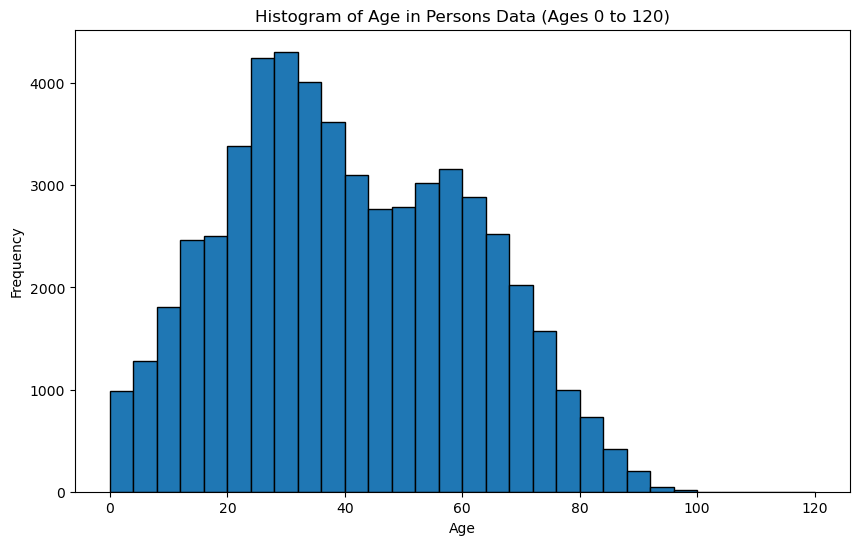

In [107]:
filtered_ages = persons_df[(persons_df['PERSON_AGE'] >= 0) & (persons_df['PERSON_AGE'] <= 120)]['PERSON_AGE']

plt.figure(figsize=(10, 6))
plt.hist(filtered_ages, bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age in Persons Data (Ages 0 to 120)')
plt.show()

In [116]:
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].fillna(persons_df['PERSON_AGE'].median())
persons_df['PERSON_SEX'] = persons_df['PERSON_SEX'].fillna('Unknown')

In [118]:
persons_df = persons_df[(persons_df['PERSON_AGE'] >= 0) & (persons_df['PERSON_AGE'] <= 120)]

In [120]:
persons_df.rename(columns={'CRASH_DATE': 'CRASH DATE', 'CRASH_TIME': 'CRASH TIME'}, inplace=True)

In [128]:
persons_df['PERSON_AGE'] = persons_df['PERSON_AGE'].astype(int)

In [122]:
persons_df.head(5)

,COLLISION_ID,CRASH DATE,CRASH TIME,PERSON_AGE,PERSON_SEX
0,4055134,2018-12-31,07:50:00,41.0,F
1,4055452,2018-12-31,18:00:00,21.0,M
2,4055454,2018-12-31,17:35:00,17.0,F
3,4055461,2018-12-31,19:05:00,57.0,M
4,4055431,2018-12-31,16:48:00,22.0,M


In [126]:
# persons_df.head(5)Number of rows: 56532, Number of columns: 21 Total rows in merged DataFrame: 2230
rows, columns = persons_df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}") 

Number of rows: 56511, Number of columns: 5


## Merge Dataset
Performing an inner join to merge both dataframes.
Dont be worried about the drop in the number of rows, its inevitable. There is a lot of mismatch between the datasets so this is the only way to maintain a good quality data. In this context, I will say, less is more.
Even if you inner join, crash date and collision ID only, you will end up with the same number of rows.

In [132]:
df = pd.merge(
    collisions_df, persons_df,
    how='inner',
    left_on=['COLLISION_ID', 'CRASH DATE', 'CRASH TIME'],
    right_on=['COLLISION_ID', 'CRASH DATE', 'CRASH TIME']
)

In [134]:
print(f"Total rows in merged DataFrame: {df.shape[0]}") 

Total rows in merged DataFrame: 2339


In [136]:
#rounding teh crash time column but need to convert to datetime64[ns] to use the round function.
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M:%S')
df['CRASH TIME'] = df['CRASH TIME'].dt.round('h')
df['CRASH TIME'] = df['CRASH TIME'].dt.time

In [138]:
df.head(5)

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1,PERSON_AGE,PERSON_SEX
0,2019-01-02,16:00:00,40.71058,-74.007385,"(40.71058, -74.007385)",1,0,1,0,0,0,0,0,Passing or Lane Usage Improper,4061151,Taxi,60,M
1,2019-01-03,18:00:00,40.704422,-73.792854,"(40.704422, -73.792854)",1,0,1,0,0,0,0,0,Failure to Yield Right-of-Way,4061375,Station Wagon/Sport Utility Vehicle,60,F
2,2019-01-08,07:00:00,40.652855,-73.945915,"(40.652855, -73.945915)",1,0,1,0,0,0,0,0,Backing Unsafely,4063731,Station Wagon/Sport Utility Vehicle,42,F
3,2019-01-09,12:00:00,40.669857,-73.95051,"(40.669857, -73.95051)",0,0,0,0,0,0,0,0,Driver Inattention/Distraction,4066070,Sedan,0,M
4,2019-01-12,16:00:00,40.602535,-73.99321,"(40.602535, -73.99321)",1,0,1,0,0,0,0,0,Following Too Closely,4065635,Pick-up Truck,35,F


### Weather Dataset
The weather data doesnt require as much cleaning as the other two datasets. The key steps taken here was removal of the first two three rows (you can do this manually) and renaming the temperatures column (you have to do this manually because of the degree sign). 

In [140]:
weather_df = pd.read_csv("open-meteo-2018inches.csv")
weather_df = weather_df.iloc[2:]

In [142]:
new_header = weather_df.iloc[0] 
weather_df = weather_df[1:] 
weather_df.columns = new_header 

In [144]:
# weather_df.head(5)

In [146]:
weather_df[['date', 'time']] = weather_df['time'].str.split('T', expand=True)

In [148]:
weather_df = weather_df.reset_index(drop=True)
weather_df = weather_df.rename_axis(None, axis=1)

In [150]:
weather_df.rename(columns={
    'precipitation (inch)': 'precipitation',
    'rain (inch)': 'rain',
    'snowfall (inch)': 'snowfall',
    'snow_depth (ft)': 'snow_depth'
}, inplace=True)

In [152]:
columns_to_float = ['temperature', 'precipitation', 'rain', 'snowfall', 'snow_depth']
for column in columns_to_float:
    weather_df[column] = weather_df[column].astype(float)

In [154]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['time'] = pd.to_datetime(weather_df['time'], format='%H:%M').dt.time

In [156]:
weather_df.head(5)

,time,temperature,precipitation,rain,snowfall,snow_depth,date
0,00:00:00,2.4,0.0,0.0,0.0,0.0,2018-12-31
1,01:00:00,1.2,0.0,0.0,0.0,0.0,2018-12-31
2,02:00:00,0.9,0.0,0.0,0.0,0.0,2018-12-31
3,03:00:00,0.5,0.0,0.0,0.0,0.0,2018-12-31
4,04:00:00,0.1,0.0,0.0,0.0,0.0,2018-12-31


### Merge Weather Data
The dimension of the final data reduced even further because we extracted data from 2018 - 2024 (day the extraction was done) with the intention of only using the data from 2019 to 2023, so that we have complete years.

In [158]:
final_df = pd.merge(
    df, weather_df,
    how='inner',
    left_on=['CRASH DATE', 'CRASH TIME'],
    right_on=['date', 'time']
)

In [160]:
final_df.head(5)

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,LOCATION,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,VEHICLE TYPE CODE 1,PERSON_AGE,PERSON_SEX,time,temperature,precipitation,rain,snowfall,snow_depth,date
0,2019-01-02,16:00:00,40.71058,-74.007385,"(40.71058, -74.007385)",1,0,1,0,0,...,Taxi,60,M,16:00:00,2.6,0.0,0.0,0.0,0.0,2019-01-02
1,2019-01-03,18:00:00,40.704422,-73.792854,"(40.704422, -73.792854)",1,0,1,0,0,...,Station Wagon/Sport Utility Vehicle,60,F,18:00:00,6.9,0.0,0.0,0.0,0.0,2019-01-03
2,2019-01-08,07:00:00,40.652855,-73.945915,"(40.652855, -73.945915)",1,0,1,0,0,...,Station Wagon/Sport Utility Vehicle,42,F,07:00:00,0.9,0.0,0.0,0.0,0.0,2019-01-08
3,2019-01-09,12:00:00,40.669857,-73.95051,"(40.669857, -73.95051)",0,0,0,0,0,...,Sedan,0,M,12:00:00,4.2,0.0,0.0,0.0,0.0,2019-01-09
4,2019-01-12,16:00:00,40.602535,-73.99321,"(40.602535, -73.99321)",1,0,1,0,0,...,Pick-up Truck,35,F,16:00:00,-1.8,0.0,0.0,0.0,0.0,2019-01-12


In [162]:
final_df.to_csv("main_dataset.csv", header=True)

## DEBUGGING

Enter any debugging code.

In [95]:
# print("Unique times in merged_df:", final_df['CRASH TIME'].unique())
# print("Unique times in weather_df:", weather_df['time'].unique())

In [96]:
# print("\nNull Values in Persons Data:")
# print(final_df.isnull().sum())

In [97]:
# final_df.shape[0]

In [98]:
# weather_df.dtypes

In [99]:
# df.dtypes